# Ex. 13 from ISL

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
def sorting(l1, l2):
    idx = np.argsort(l1)
    return l1[idx], l2[idx]

In [3]:
def generate_data(x_mean, x_variance, e_mean, e_variance, size=100, b_0=-1, b_1=0.5):
    # Setting seed to ensure consistent results
    np.random.seed(1)
    x = np.random.normal(x_mean, sqrt(x_variance), size)
    eps = np.random.normal(e_mean, sqrt(e_variance), size)
    # b_0 in other words intercept (constant) -- expected mean value of Y when all X=0
    y = b_0 + b_1 * x + eps
    x, y = sorting(x, y)
    return x, y

In [4]:
x_mean = 0
x_variance = 1
e_mean = 0
e_variance = 0.25

What is the lenght of the vector y?
- 100 

What are the values of $\beta_0$ and $\beta_1$?
- $\beta_0$ - Intercept - Expected value of Y when X = 0. 
- $\beta_0$ = -1
- $\beta_1$ - Slope - Average increase in Y associated witho a one-unit increase in X.
- $\beta_1$ = 0.5



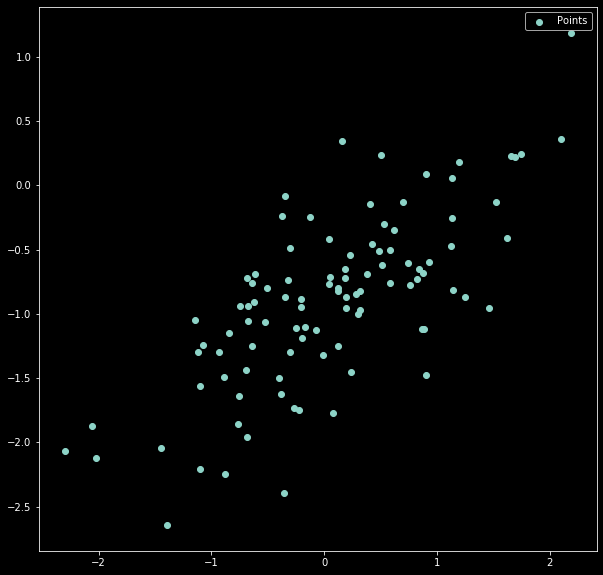

In [5]:
x, y = generate_data(x_mean, x_variance, e_mean, e_variance)
df = {"x": x, "y": y}
# d)
plt.scatter(x,y, label="Points")
plt.legend()
plt.show()

In [6]:
model = sm.OLS.from_formula("y ~ x", data=df).fit()
model.summary()
intercept = model.params["Intercept"]
slope = model.params["x"]

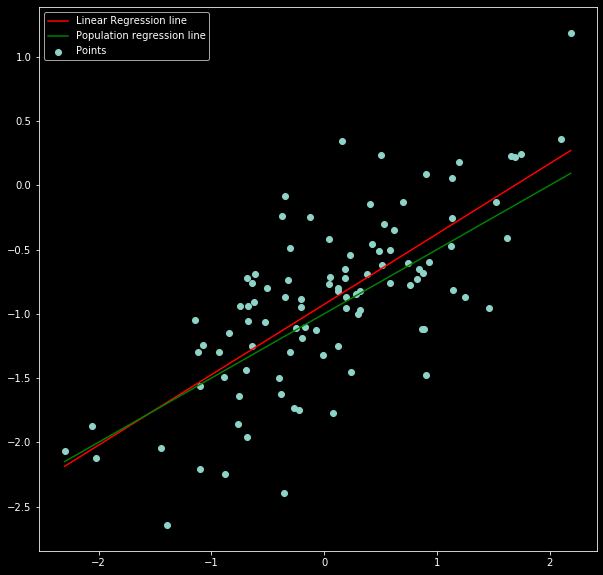

In [7]:
plt.scatter(x,y, label="Points")
plt.plot(x, intercept + slope * x, color = 'r', label="Linear Regression line")
plt.plot(x, -1 + 0.5 * x, color = 'g', label="Population regression line")
plt.legend()
plt.show()

In [8]:
model2 =  sm.OLS.from_formula("y ~ x + I(x ** 2)", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           2.83e-16
Time:                        12:16:32   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x              0.5468      0.053     10.229      0.000       0.441       0.653
I(x ** 2)      0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
intercept_2 = model2.params["Intercept"]
slope_x = model2.params["x"]
slope_x2 = model2.params["I(x ** 2)"]

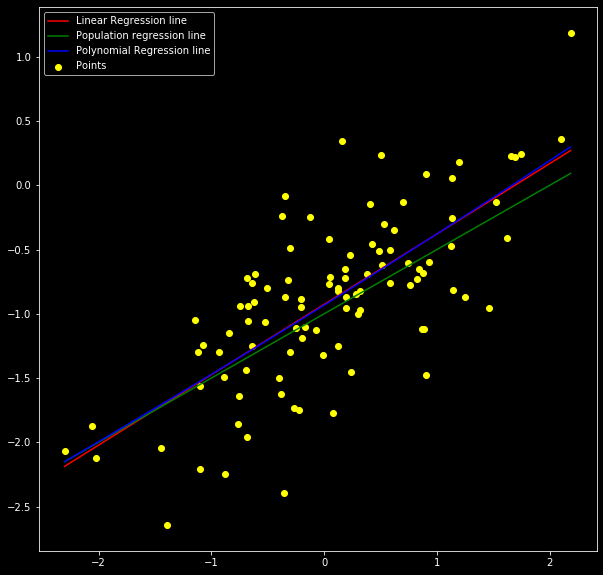

In [10]:
plt.scatter(x, y, label="Points", color="yellow")
plt.plot(x, intercept + slope * x, color = 'r', label="Linear Regression line")
plt.plot(x, -1 + 0.5 * x, color = 'g', label="Population regression line")
plt.plot(x, intercept_2 + slope_x * x + slope_x2 * (x ** 2), color = 'b', label="Polynomial Regression line") 
plt.legend()
plt.show()

In [11]:
x_less, y_less = generate_data(x_mean, x_variance, e_mean, e_variance - 0.22)
less_df = {"x" : x_less, "y" : y_less}
model_less = sm.OLS.from_formula("y ~ x", data=less_df).fit()
intercept_less = model_less.params["Intercept"]
slope_less = model_less.params["x"]
model_less.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     792.7
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           9.21e-49
Time:                        12:16:33   Log-Likelihood:                 40.889
No. Observations:                 100   AIC:                            -77.78
Df Residuals:                      98   BIC:                            -72.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9745      0.016    -59.871      0.000      -1.007      -0.942
x              0.5165      0.018     28.154      0.000       0.480       0.553
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
x_more, y_more = generate_data(x_mean, x_variance, e_mean, e_variance + 0.22)
more_df = {"x" : x_more, "y" : y_more}
model_more = sm.OLS.from_formula("y ~ x", data=more_df).fit()
intercept_more = model_more.params["Intercept"]
slope_more = model_more.params["x"]
model_more.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     60.63
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           7.23e-12
Time:                        12:16:33   Log-Likelihood:                -96.688
No. Observations:                 100   AIC:                             197.4
Df Residuals:                      98   BIC:                             202.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8992      0.064    -13.957      0.000      -1.027      -0.771
x              0.5654      0.073      7.786      0.000       0.421       0.710
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

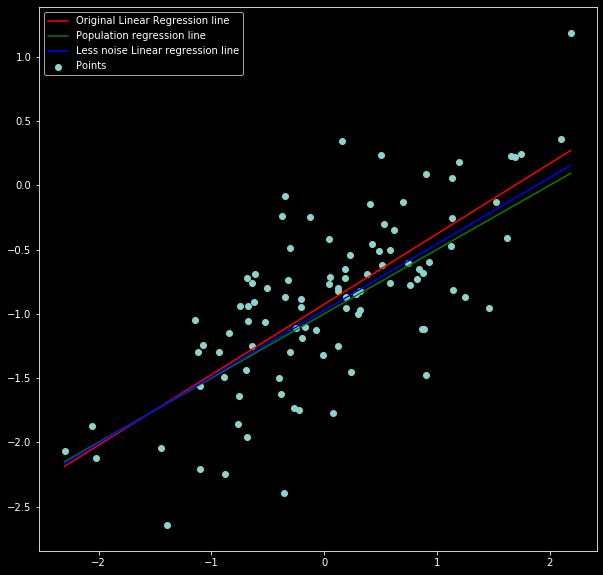

In [13]:
plt.scatter(x,y, label="Points")
plt.plot(x, intercept + slope * x, color = 'r', label="Original Linear Regression line")
plt.plot(x, -1 + 0.5 * x, color = 'g', label="Population regression line")
plt.plot(x, intercept_less + slope_less * x, color = 'b', label="Less noise Linear regression line")
plt.legend()
plt.show()

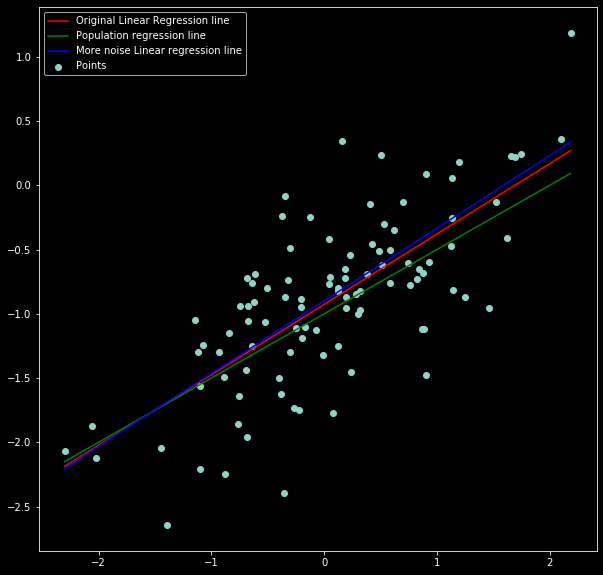

In [14]:
plt.scatter(x,y, label="Points")
plt.plot(x, intercept + slope * x, color = 'r', label="Original Linear Regression line")
plt.plot(x, -1 + 0.5 * x, color = 'g', label="Population regression line")
plt.plot(x, intercept_more + slope_more * x, color = 'b', label="More noise Linear regression line")
plt.legend()
plt.show()

In [15]:
original_conf_int = model.conf_int()
less_conf_int = model_less.conf_int()
more_conf_int = model_more.conf_int()


In [16]:
def calc_intervals(intervals):
    ci_intercept = intervals.loc["Intercept"]
    ci_x= intervals.loc["x"]

    print(f"Intercept interval: {abs(ci_intercept[0] - ci_intercept[1])}")
    print(f"x interval: {abs(ci_x[0] - ci_x[1])}")

In [17]:
calc_intervals(original_conf_int)

Intercept interval: 0.18649545906036258
x interval: 0.21020037995580304


In [18]:
calc_intervals(less_conf_int)

Intercept interval: 0.0646039220946859
x interval: 0.07281554757074676


In [19]:
calc_intervals(more_conf_int)

Intercept interval: 0.2557096903722158
x interval: 0.2882122403700098
